###Covid-19 Cases & Deaths – World
Manal Mohammed Alyaremi 

Nada Aldubaie

The aim of this notebook is to visualize the total number of cases and deaths caused by Covid-19 in countries on the world map, and to compare these countries,show countries with high Cases and high Cases Percentage

#Importing required libraries

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Importing data

In [ ]:
from google.colab import files
files.upload();

Saving covid_worldwide.csv to covid_worldwide.csv


In [ ]:
#as csv file
df=pd.read_csv("covid_worldwide.csv")

# Displaying data

In [ ]:
#displaying Data 
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [ ]:
#look at data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


#Data Cleaning

Handling Duplicate Data

In [ ]:
#drop duplicate in specific columns 
df=df.drop_duplicates(subset=['Country'],keep="first")
#keep first value

Handling syntax errors

In [ ]:
#convert all columns to best possible dtype and displaying data type for all columns 
df.convert_dtypes().dtypes

Serial Number       Int64
Country            string
Total Cases        string
Total Deaths       string
Total Recovered    string
Active Cases       string
Total Test         string
Population         string
dtype: object

Removing unwanted Characters

In [ ]:
#we can convert specific column to string and removing characters
df['Total Cases']=df['Total Cases'].str.replace(r'\W',"");
df['Total Deaths']=df['Total Deaths'].str.replace(r'\W',"");
df['Total Recovered']=df['Total Recovered'].str.replace(r'\W',"");
df['Active Cases']=df['Active Cases'].str.replace(r'\W',"");
df['Total Test']=df['Total Test'].str.replace(r'\W',"");
df['Population']=df['Population'].str.replace(r'\W',"");
# (r'\W): any characters are not number or letters

<ipython-input-27-9e870ffdf620>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Total Cases']=df['Total Cases'].str.replace(r'\W',"");
<ipython-input-27-9e870ffdf620>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Total Deaths']=df['Total Deaths'].str.replace(r'\W',"");
<ipython-input-27-9e870ffdf620>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Total Recovered']=df['Total Recovered'].str.replace(r'\W',"");
<ipython-input-27-9e870ffdf620>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Active Cases']=df['Active Cases'].str.replace(r'\W',"");
<ipython-input-27-9e870ffdf620>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Total Test']=df['Total Test'].str.replace(r'\W',"");
<ipython-input-27-9e870ffdf620>:7: Futur

In [ ]:
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,104196861,1132935,101322779,1741147,1159832679,334805269
1,2,India,44682784,530740,44150289,1755,915265788,1406631776
2,3,France,39524311,164233,39264546,95532,271490188,65584518
3,4,Germany,37779833,165711,37398100,216022,122332384,83883596
4,5,Brazil,36824580,697074,35919372,208134,63776166,215353593
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,626161
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [ ]:
# convert to numerical
df["Total Cases"] = pd.to_numeric(df["Total Cases"], downcast="float")
df["Total Deaths"] = pd.to_numeric(df["Total Deaths"], downcast="float")
df["Total Recovered"] = pd.to_numeric(df["Total Recovered"], downcast="float")
df["Active Cases"] = pd.to_numeric(df["Active Cases"], downcast="float")
df["Total Test"] = pd.to_numeric(df["Total Test"], downcast="float")
df["Population"] = pd.to_numeric(df["Population"], downcast="float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Serial Number    231 non-null    int64  
 1   Country          231 non-null    object 
 2   Total Cases      231 non-null    float32
 3   Total Deaths     225 non-null    float32
 4   Total Recovered  210 non-null    float32
 5   Active Cases     212 non-null    float32
 6   Total Test       213 non-null    float32
 7   Population       228 non-null    float32
dtypes: float32(6), int64(1), object(1)
memory usage: 10.8+ KB


In [ ]:
#remove white space from head  and tail of string 
df['Country'].str.strip()

0                   USA
1                 India
2                France
3               Germany
4                Brazil
             ...       
226    Diamond Princess
227        Vatican City
228      Western Sahara
229          MS Zaandam
230             Tokelau
Name: Country, Length: 231, dtype: object

Handling missing data

In [ ]:
#filling empty rows with NaN using so the pandas can recognize missing values as null
df=df.replace('',np.NaN)

In [ ]:
#check null values 
df.isnull()
# Ture for Null values

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
226,False,False,False,False,False,False,True,True
227,False,False,False,True,False,False,True,False
228,False,False,False,False,False,False,True,False
229,False,False,False,False,False,False,True,True


In [ ]:
# the number of missing values in each columns
df.isnull().sum()

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

filling missing values

In [ ]:
# if we have numerical variable
#filling missing value based on other variable
#filling missing value with mean()
df['Total Deaths'].replace([np.NaN],df['Total Deaths'].mean(),inplace=True);
df['Total Recovered'].replace([np.NaN],df['Total Recovered'].mean(),inplace=True)
df['Active Cases'].replace([np.NaN],df['Active Cases'].mean(),inplace=True)
df['Total Test'].replace([np.NaN],df['Total Test'].mean(),inplace=True)
df['Population'].replace([np.NaN],df['Population'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Serial Number      0
Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
dtype: int64

In [ ]:
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,104196864.0,1.132935e+06,101322776.0,1741147.0,1.159833e+09,3.348053e+08
1,2,India,44682784.0,5.307400e+05,44150288.0,1755.0,9.152658e+08,1.406632e+09
2,3,France,39524312.0,1.642330e+05,39264544.0,95532.0,2.714902e+08,6.558452e+07
3,4,Germany,37779832.0,1.657110e+05,37398100.0,216022.0,1.223324e+08,8.388360e+07
4,5,Brazil,36824580.0,6.970740e+05,35919372.0,208134.0,6.377617e+07,2.153536e+08
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712.0,1.300000e+01,699.0,0.0,3.249316e+07,2.849326e+07
227,228,Vatican City,29.0,3.005778e+04,29.0,0.0,3.249316e+07,7.990000e+02
228,229,Western Sahara,10.0,1.000000e+00,9.0,0.0,3.249316e+07,6.261610e+05
229,230,MS Zaandam,9.0,2.000000e+00,7.0,0.0,3.249316e+07,2.849326e+07


#Data visualization

In [ ]:
df.describe() #Getting a summary of the numerical data

,Serial Number,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
count,231.000000,231.0,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02
mean,116.000000,2923460.0,3.005778e+04,2.993905e+06,9.099885e+04,3.249316e+07,2.849326e+07
std,66.828138,9479287.0,1.039969e+05,9.075190e+06,7.340514e+05,1.130361e+08,1.016110e+08
min,1.000000,5.0,1.000000e+00,2.000000e+00,0.000000e+00,7.850000e+03,7.990000e+02
25%,58.500000,24001.0,2.250000e+02,2.845900e+04,6.300000e+01,4.059510e+05,4.932080e+05
50%,116.000000,206592.0,2.570000e+03,3.370400e+05,1.868000e+03,2.824843e+06,5.834950e+06
75%,173.500000,1296145.5,1.687700e+04,2.993905e+06,1.882100e+04,2.549222e+07,2.493964e+07
max,231.000000,104196864.0,1.132935e+06,1.013228e+08,1.095262e+07,1.159833e+09,1.406632e+09


Which countries were having more cases and deaths?

In [ ]:
#We use the same method to obtain the total
#number of deaths and Cases of each country and select 
#the values of the top ten most affected countries.
total_cases = df.groupby('Country')['Total Cases'].sum()
total_cases = total_cases.sort_values(ascending=False)

most_affected_countries = total_cases[0:10].index
cases = total_cases[0:10].values # Number of Cases in Top 10 Countries

In [ ]:
total_deaths = df.groupby('Country')['Total Deaths'].sum()
deaths = total_deaths[most_affected_countries].values # Number of Deaths in Top 10 Countries

cases_deaths_df = pd.DataFrame({'Country': most_affected_countries, 'Total Cases': cases, 'Total Deaths': deaths})
print(cases_deaths_df)

    Country  Total Cases  Total Deaths
0       USA  104196864.0     1132935.0
1     India   44682784.0      530740.0
2    France   39524312.0      164233.0
3   Germany   37779832.0      165711.0
4    Brazil   36824580.0      697074.0
5     Japan   32588442.0       68399.0
6  S. Korea   30197066.0       33486.0
7     Italy   25453788.0      186833.0
8        UK   24274360.0      204171.0
9    Russia   21958696.0      395108.0


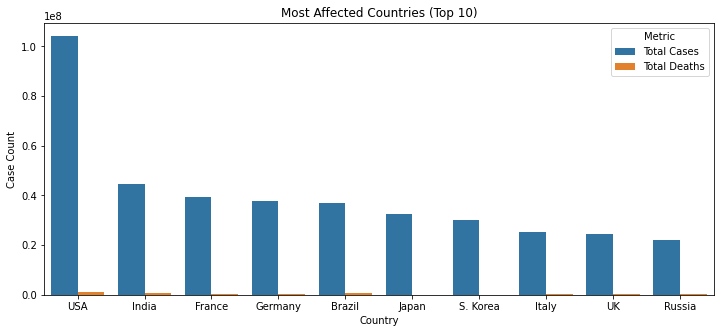

In [ ]:
plot_data = pd.melt(cases_deaths_df, id_vars = ['Country'],  value_vars=['Total Cases', 'Total Deaths'], 
                var_name='Metric', value_name='Case Count') # Plot Friendly Format
plt.figure(figsize=(12, 5))
sns.barplot(x="Country", hue="Metric", y="Case Count", data=plot_data)
plt.title('Most Affected Countries (Top 10)')
plt.show()

Which countries were more contaminated of covid19 with respect to their population.

In [ ]:
#percentage of covid cases with respect to population in every country
df['cases_percentage']=(df['Total Cases']/df['Population'])*100
df.sort_values(by='cases_percentage', ascending=False, inplace=True,ignore_index=True)
df.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,cases_percentage
0,165,Faeroe Islands,34658.0,28.0,2993905.0,90998.851562,778000.0,49233.0,70.395874
1,174,San Marino,23427.0,122.0,23276.0,29.000000,157634.0,34085.0,68.731110
2,23,Austria,5780229.0,21689.0,5730189.0,28351.000000,211273520.0,9066710.0,63.752220
3,57,Slovenia,1321852.0,7056.0,1311159.0,3637.000000,2824843.0,2078034.0,63.610703
4,106,Brunei,275220.0,225.0,243601.0,31394.000000,717784.0,445431.0,61.787350


In [ ]:
cases_percentage= df.groupby('Country')['cases_percentage'].sum()
cases_percentage =cases_percentage.sort_values(ascending=False)

most_affected_countries = cases_percentage[0:10].index
cases = cases_percentage[0:10].values # Number of Cases in Top 10 Countries

In [ ]:
cases = pd.DataFrame({'Country': most_affected_countries, 'cases_percentage':cases})
print(cases)

          Country  cases_percentage
0  Faeroe Islands         70.395874
1      San Marino         68.731110
2         Austria         63.752220
3        Slovenia         63.610703
4          Brunei         61.787350
5         Andorra         61.757225
6      Martinique         61.399353
7       Gibraltar         60.523975
8         Iceland         60.420448
9          France         60.264694


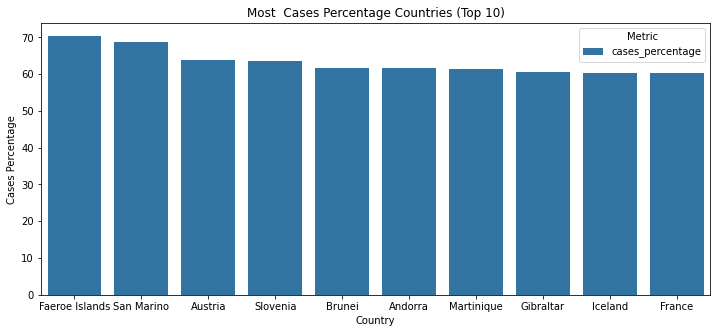

In [ ]:
plot_data = pd.melt(cases, id_vars = ['Country'],  value_vars=['cases_percentage'],                 
var_name='Metric', value_name='Cases Percentage') # Plot Friendly Format
plt.figure(figsize=(12, 5))
sns.barplot(x="Country", hue="Metric", y="Cases Percentage", data=plot_data)
plt.title('Most  Cases Percentage Countries (Top 10)')
plt.show()

Countries have a high cases and deaths are with red and dark red colors

In [ ]:
fig1= px.scatter_geo(df, locations='Country',locationmode="country names",scope="world",color="Total Cases",size="Total Cases",size_max=30,title="Covid-19 Cases Around the Globe",template='plotly_white',color_continuous_scale="YlOrRd")
fig1.show()

In [ ]:
fig2= px.scatter_geo(df, locations='Country',locationmode="country names",scope="world",color="Total Deaths",size="Total Deaths",size_max=30,title="Covid-19 Deaths Around the Globe",template='plotly_white',color_continuous_scale="YlOrRd")
fig2.show()

Discussion

Top 5 countries which were having more cases world wide were USA ,India ,France, Germany ,and Brazil.
But if we look upon the percentage of morecontamination withh respect to population then Faeroe Islands, San Marino , Austria , Slovenia ,and Brunei.. Because these countries were having bigger percentage ratio of total cases vs population.